In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

Using TensorFlow backend.


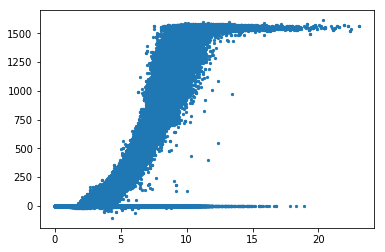

In [3]:
#读取数据
dataset = pd.read_csv('1.csv',encoding='ANSI')
#丢弃缺失数据，数据类型转换
dataset.dropna(how='any',inplace=True)
#数据读入
x=dataset['风速'].values
p=dataset['功率'].values
#数据可视化
plt.scatter(x,p,s=5)

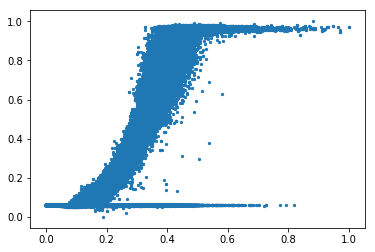

In [4]:
#数据归一化
min_max_scaler_x = preprocessing.MinMaxScaler()
x_minmax = min_max_scaler_x.fit_transform(x.reshape(-1, 1))

min_max_scaler_p = preprocessing.MinMaxScaler()
p_minmax = min_max_scaler_p.fit_transform(p.reshape(-1, 1))
plt.scatter(x_minmax,p_minmax,s=5)

In [6]:
#数据划分 训练数据：80% 测试数据：20%
import math
train_size=math.ceil(0.8*x.shape[0])
test_size=x.shape[0]-train_size

x_train=x_minmax[0:train_size]
x_test=x_minmax[train_size:]
p_train=p_minmax[0:train_size]
p_test=p_minmax[train_size:]

# x_train=x[0:train_size]
# x_test=x[train_size:]
# p_train=p[0:train_size]
# p_test=p[train_size:]

In [7]:
#离群点不敏感函数
import keras.backend as K
import tensorflow as tf
def huber_loss(y_true, y_pred, delta=0.05):
    residual = K.abs(y_pred - y_true)
    condition = K.less(residual, delta)
    small_res = 0.5 * K.square(residual)
    large_res = delta * residual - 0.5 * K.square(delta)
    return tf.where(condition, small_res, large_res)

In [ ]:
#建立模型
model = Sequential()
model.add(Dense(output_dim=64,input_dim=1,activation='relu'))
model.add(Dense(output_dim=64,activation='relu'))
model.add(Dense(output_dim=1,activation='linear'))
model.compile(optimizer='adam',loss=huber_loss)

#训练模型
history = model.fit(x_train, p_train,batch_size=64,epochs=200,verbose=1,shuffle=True,validation_split=0.1)
p_pred = model.predict(x_test)

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, activation="relu", units=64)`
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64)`
  after removing the cwd from sys.path.
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  """


Train on 417226 samples, validate on 46359 samples
Epoch 1/200
417226/417226 [==============================] - 15s 35us/step - loss: 9.6111e-04 - val_loss: 9.1645e-04
Epoch 2/200
417226/417226 [==============================] - 15s 35us/step - loss: 8.6736e-04 - val_loss: 8.9922e-04
Epoch 3/200
417226/417226 [==============================] - 15s 35us/step - loss: 8.6519e-04 - val_loss: 0.0011
Epoch 4/200
417226/417226 [==============================] - 15s 36us/step - loss: 8.6464e-04 - val_loss: 8.9854e-04
Epoch 5/200
417226/417226 [==============================] - 19s 44us/step - loss: 8.6253e-04 - val_loss: 9.1102e-04
Epoch 6/200
417226/417226 [==============================] - 19s 45us/step - loss: 8.6150e-04 - val_loss: 9.4914e-04
Epoch 7/200
417226/417226 [==============================] - 24s 58us/step - loss: 8.6098e-04 - val_loss: 9.3323e-04
Epoch 8/200
417226/417226 [==============================] - 23s 55us/step - loss: 8.6017e-04 - val_loss: 0.0010
Epoch 9/200
417226/41

In [25]:
#建立模型
model_mse= Sequential()
model_mse.add(Dense(output_dim=64,input_dim=1,activation='relu'))
model_mse.add(Dense(output_dim=64,activation='relu'))
model_mse.add(Dense(output_dim=1,activation='linear'))
model_mse.compile(optimizer='adam',loss='mse')

#训练模型
history1 = model1.fit(x_train, p_train,batch_size=64,epochs=200,verbose=1,shuffle=True,validation_split=0.1)
p_pred_mse = model1.predict(x_test)

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, activation="relu", units=64)`
  
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64)`
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  after removing the cwd from sys.path.


Train on 348400 samples, validate on 38712 samples
Epoch 1/200
348400/348400 [==============================] - 11s 32us/step - loss: 0.0123 - val_loss: 0.0021
Epoch 2/200
348400/348400 [==============================] - 11s 30us/step - loss: 0.0113 - val_loss: 0.0023
Epoch 3/200
348400/348400 [==============================] - 11s 31us/step - loss: 0.0113 - val_loss: 0.0020
Epoch 4/200
348400/348400 [==============================] - 12s 33us/step - loss: 0.0113 - val_loss: 0.0021
Epoch 5/200
348400/348400 [==============================] - 9s 27us/step - loss: 0.0112 - val_loss: 0.0022
Epoch 6/200
348400/348400 [==============================] - 9s 27us/step - loss: 0.0113 - val_loss: 0.0021
Epoch 7/200
348400/348400 [==============================] - 9s 27us/step - loss: 0.0112 - val_loss: 0.0021
Epoch 8/200
348400/348400 [==============================] - 9s 27us/step - loss: 0.0112 - val_loss: 0.0020
Epoch 9/200
348400/348400 [==============================] - 9s 27us/step - loss:

Epoch 128/200
348400/348400 [==============================] - 12s 36us/step - loss: 0.0111 - val_loss: 0.0020
Epoch 129/200
348400/348400 [==============================] - 12s 35us/step - loss: 0.0111 - val_loss: 0.0020
Epoch 130/200
348400/348400 [==============================] - 13s 37us/step - loss: 0.0111 - val_loss: 0.0020
Epoch 131/200
348400/348400 [==============================] - 12s 36us/step - loss: 0.0111 - val_loss: 0.0020
Epoch 132/200
348400/348400 [==============================] - 12s 35us/step - loss: 0.0111 - val_loss: 0.0020
Epoch 133/200
348400/348400 [==============================] - 13s 38us/step - loss: 0.0111 - val_loss: 0.0020
Epoch 134/200
348400/348400 [==============================] - 12s 36us/step - loss: 0.0111 - val_loss: 0.0020
Epoch 135/200
348400/348400 [==============================] - 12s 34us/step - loss: 0.0111 - val_loss: 0.0021
Epoch 136/200
348400/348400 [==============================] - 12s 35us/step - loss: 0.0111 - val_loss: 0.0020
E

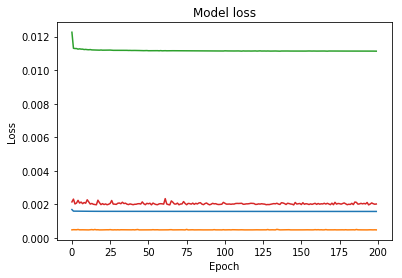

In [28]:
# 绘制训练 & 验证的损失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history_mse.history['loss'])
plt.plot(history_mse.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Validate'], loc='upper right')
plt.show()

RMSE: 6.719658%
RMSE: 6.807623%


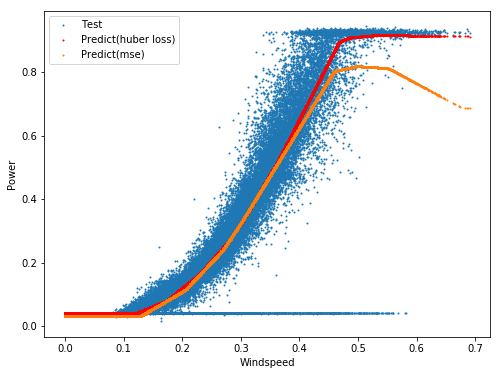

In [35]:
#可视化结果
p_pred = model.predict(x_test)
plt.figure(figsize=(8, 6))
plt.scatter(x_test, p_test,s=1)
plt.scatter(x_test,p_pred,s=1,color='red')
plt.scatter(x_test, p_pred_mse,s=1)

plt.ylabel('Power')
plt.xlabel('Windspeed')
plt.legend(['Test', 'Predict(huber loss)','Predict(mse)'], loc='upper left')
#误差分析
RMSE=100*np.sqrt(np.mean((p_test[:,0]-p_pred[:,0])**2))
print("RMSE: %f" % RMSE + "%")

RMSE=100*np.sqrt(np.mean((p_test[:,0]-p_pred_mse[:,0])**2))
print("RMSE: %f" % RMSE + "%")